In [29]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from IPython.display import HTML
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
style ='<style>svg{width: 50% !important; height: 50% !important;}</style>'
HTML(style)
titanic_data = pd.read_csv('train.csv')
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [4]:
X = X.fillna({'Age':X['Age'].median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

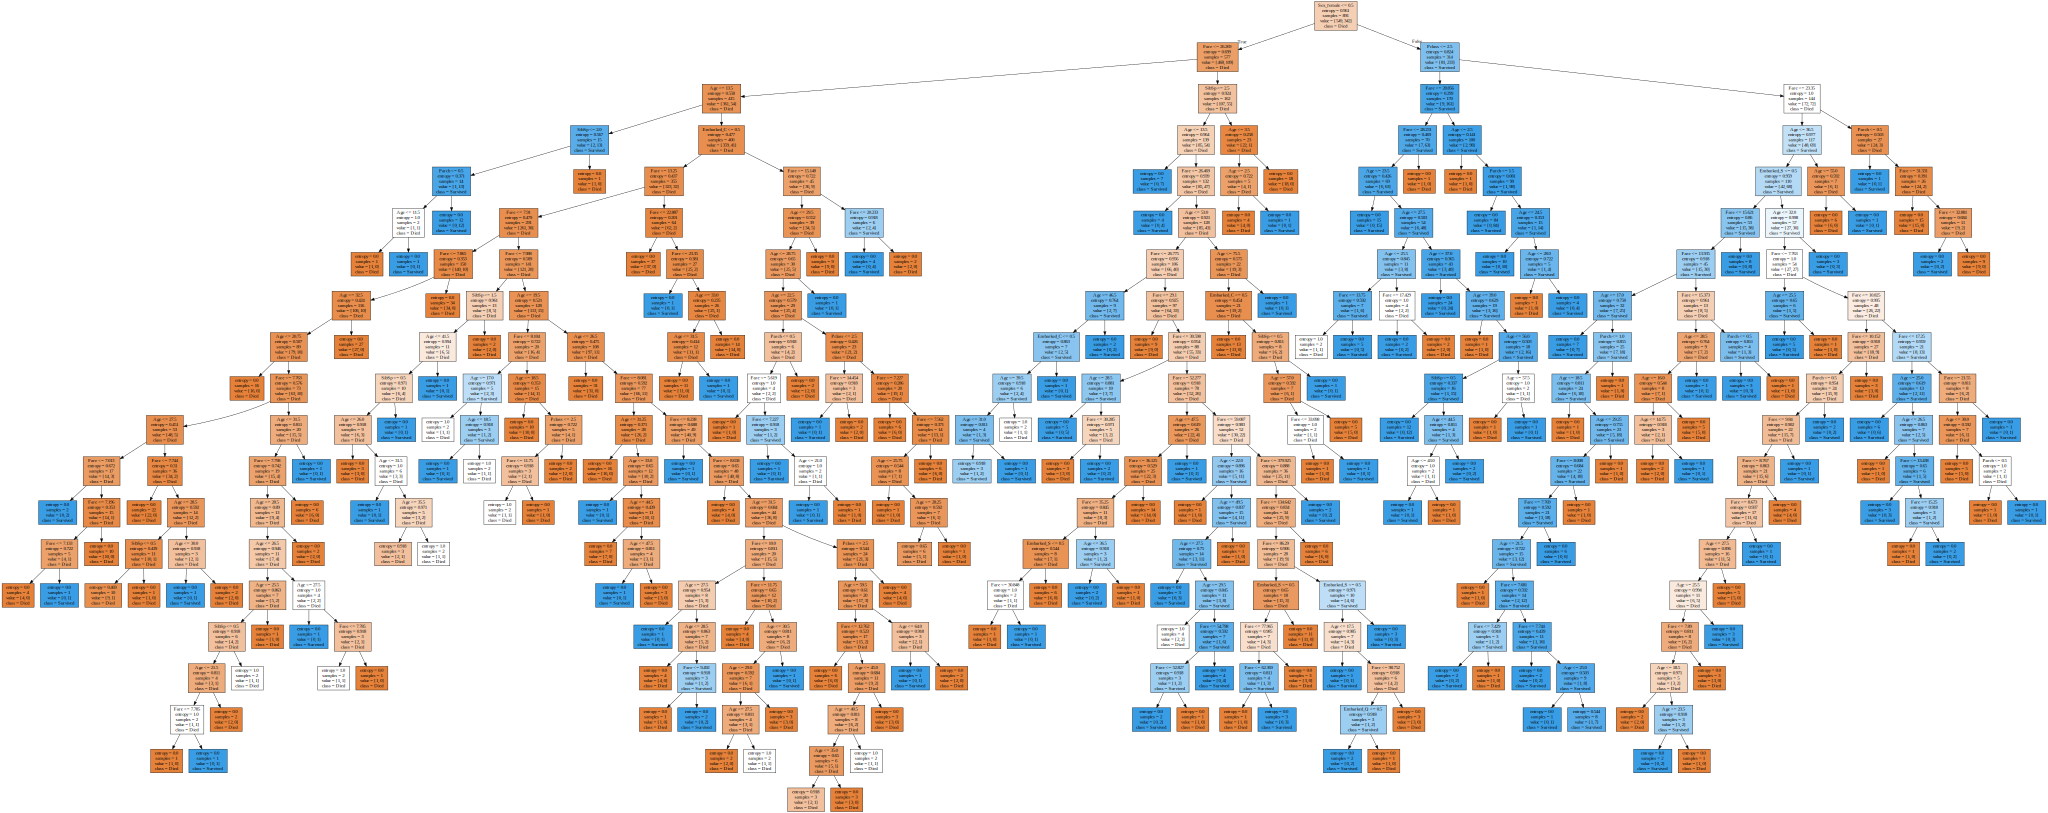

In [6]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),\
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [8]:
clf.score(X_test, y_test)

0.7661016949152543

In [9]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.823728813559322

In [10]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score]})
    scores_data = scores_data.append(temp_score_data)

In [11]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score'], \
                          var_name = 'set_type', value_name = 'score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


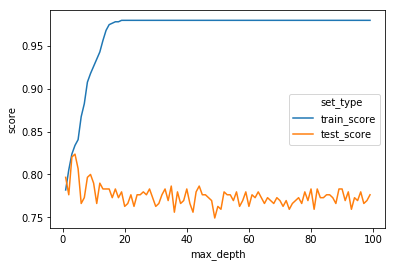

In [12]:
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [14]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

NameError: name 'cross_val_score' is not defined

In [14]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], \
                                    'test_score':[test_score], 'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.801984


In [15]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'], \
                          var_name = 'set_type', value_name = 'score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


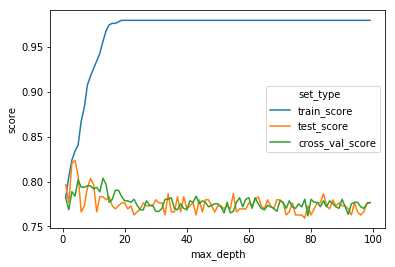

In [16]:
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [16]:
best_clf = clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7932203389830509

In [17]:
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion':['gini', 'entropy'],
            'max_depth':range(1,30)}
grid_search_cv_clf = GridSearchCV(estimator=clf, param_grid=parametrs, cv=5)

In [18]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
grid_search_cv_clf.best_params_
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.7966101694915254

In [20]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

In [21]:
y_pred = best_clf.predict(X_test)
precision_score(y_test, y_pred)

0.8125

In [22]:
recall_score(y_test, y_pred)

0.65

In [23]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_pred = np.where(y_predicted_prob[:,1]>0.9, 1, 0)

In [24]:
precision_score(y_test, y_pred)

0.8241758241758241

In [25]:
recall_score(y_test, y_pred)

0.625

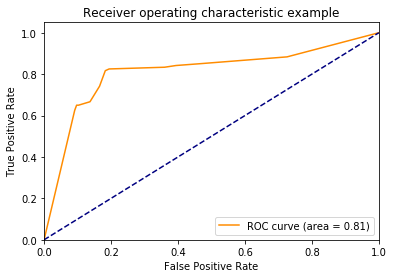

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [28]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
parametrs = {'criterion':['gini', 'entropy'],
            'max_depth':range(1,30)}
grid_search_cv_clf = GridSearchCV(estimator=clf, param_grid=parametrs, cv=5)

In [32]:
clf_rf = RandomForestClassifier(n_estimators=15, max_depth=10)
parametrs_rf = {'n_estimators':[10, 20, 30],
            'max_depth':[2, 5, 7, 10]}
grid_search_cv_clf = GridSearchCV(estimator=clf_rf, param_grid=parametrs_rf, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [36]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.8

In [40]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features':list(X_train),
                                      'feature_importances':feature_importances})
feature_importances_df.sort_values(by='feature_importances',ascending = False)

,features,feature_importances
5,Sex_female,0.255564
4,Fare,0.194814
1,Age,0.143253
6,Sex_male,0.136125
0,Pclass,0.115951
2,SibSp,0.056491
3,Parch,0.042187
7,Embarked_C,0.026366
9,Embarked_S,0.020117
8,Embarked_Q,0.009131


In [42]:
heart_df = pd.read_csv('heart.csv')
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
y = heart_df['target']
X = heart_df.drop('target', axis=1)

In [44]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

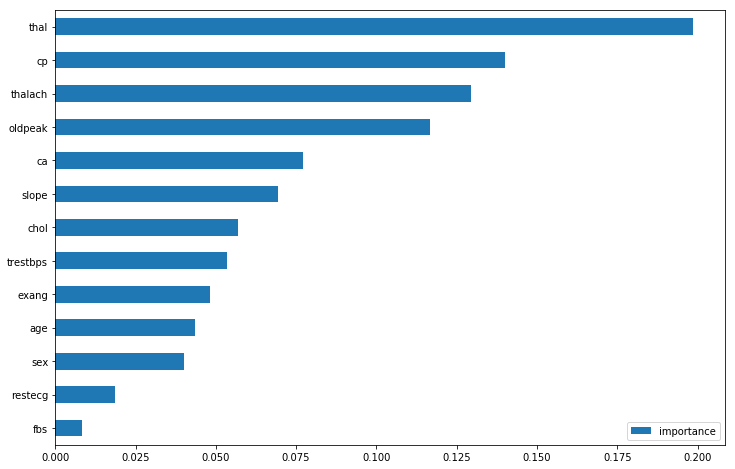

In [45]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))